In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
f = zipfile.ZipFile("/content/creditcardfraud.zip", "r")
f.extractall("/content")
f.close()

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Gathering Sense of Data

In [ ]:
#Common Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Null and Duplicates

In [ ]:
#Null

df.isnull().sum().sum()

0

In [ ]:
#Duplicates

df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


There is slight change in the data these are not complitely duplicate values, So will not drop the duplicates.

## EDA

We'll perform EDA on time, amount and target column

In [ ]:
df[["Time", "Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<ipython-input-79-a5d144711efa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Time"], ax=ax[0], kde=True).set_title("Time")
<ipython-input-79-a5d144711efa>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Amount"], ax=ax[1], kde=True).set_title("Amount")


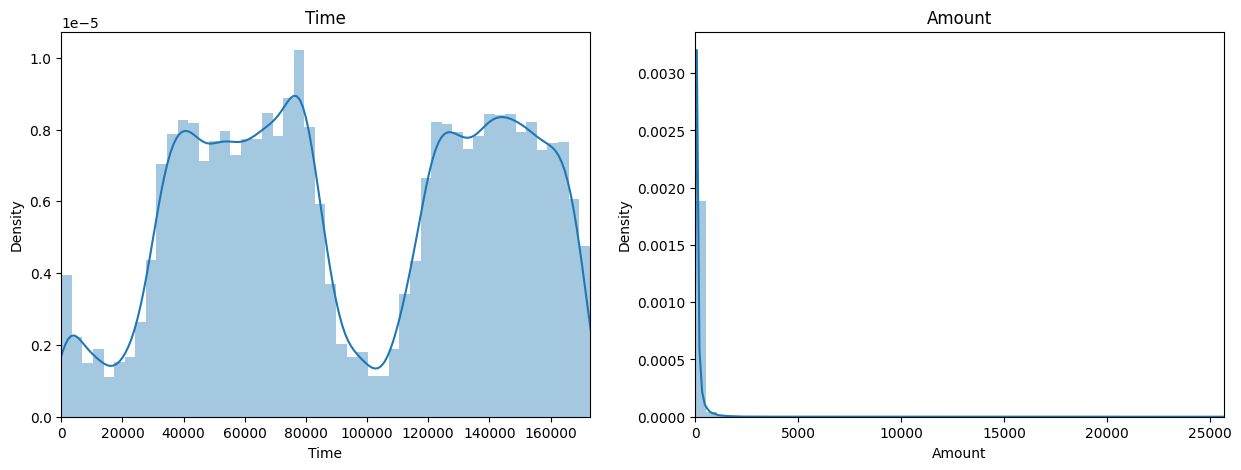

In [ ]:
columns = ["Time", "Amount"]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.distplot(df["Time"], ax=ax[0], kde=True).set_title("Time")
ax[0].set_xlim(df["Time"].min(), df["Time"].max())

sns.distplot(df["Amount"], ax=ax[1], kde=True).set_title("Amount")
ax[1].set_xlim(df["Amount"].min(), df["Amount"].max())

plt.show()

We'll perform scaling on Time and Amount

([<matplotlib.patches.Wedge at 0x7b360818ee30>,
 [Text(-1.09998380137016, 0.0059696501784341355, '1'),
  Text(1.199982329255704, -0.006512255681064682, '0')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.827%'),
  Text(0.6999896920658272, -0.0037988158139543975, '0.173%')])

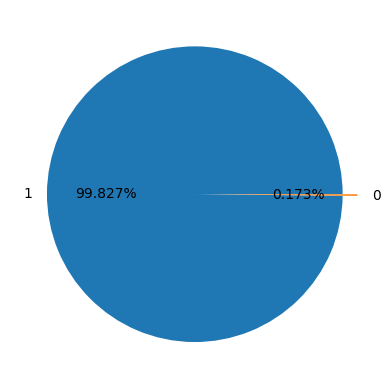

In [ ]:
plt.pie(df["Class"].value_counts(), autopct='%.03f%%',labels = [1, 0], explode = [0, 0.1])

The data is highly imbalanced

## Ways to handle the imbalanced data.
- Undersampling
- Oversampling(SMOTE)
- SMOTE + ANN

First we'll scale time and amount using RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df[["Time", "Amount"]] = scaler.fit_transform(df[["Time", "Amount"]].values)

In [ ]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

We will separate train data and validation (test) data.

Which will have the similar distributions.

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# # Create a StratifiedShuffleSplit object
# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

# # Split the data into training and test sets
# for train, test in sss.split(X, y):
#   X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 123)

In [ ]:
y_train.value_counts() / y_train.shape[0] * 100

0    99.827075
1     0.172925
Name: Class, dtype: float64

In [ ]:
y_test.value_counts() / y_test.shape[0] * 100

0    99.827955
1     0.172045
Name: Class, dtype: float64

Now we have our train and test data with similar distribution.

Next we'll use under sampling technique. to train our model. and we'll use test data to check accuracy.

In [ ]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

### Under Sampling
There are 394 fraud transaction in our X_train, We'll randomly select 394 non fraud transaction it will make the ditribution balanced, But there is risk of loss of information.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1234)

X_train_u_sample, y_train_u_sample = rus.fit_resample(X_train, y_train)

Now, We will try to train the ML models using under sampled data, also we'll check their classification metrics on test data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

lr = LogisticRegression()
xgb = XGBClassifier()

models = {
    "Logistic Regression": lr,
    "XGBoost Classifier": xgb
}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

print("Under Sampling Results")

for i in models.keys():
  print('Model: ', i, "\n")
  model = models[i]
  model.fit(X_train_u_sample, y_train_u_sample)

  y_pred = model.predict(X_test)

  print(f"Accuracy : {accuracy_score(y_test, y_pred)}\n")
  print(f"fl Score : {f1_score(y_test, y_pred)}\n")
  print(f"ROC AUC  : {accuracy_score(y_test, y_pred)}\n")
  print(f"Confussion Matrix : \n{confusion_matrix(y_test, y_pred)}\n")
  print("-"*75)

Under Sampling Results
Model:  Logistic Regression 

Accuracy : 0.9774059899582178

fl Score : 0.1166781056966369

ROC AUC  : 0.9774059899582178

Confussion Matrix : 
[[55590  1274]
 [   13    85]]

---------------------------------------------------------------------------
Model:  XGBoost Classifier 

Accuracy : 0.9702082089814262

fl Score : 0.09105516871987146

ROC AUC  : 0.9702082089814262

Confussion Matrix : 
[[55180  1684]
 [   13    85]]

---------------------------------------------------------------------------


As we can see that f1 score is too low. It shows that models are not abble to recognise the non fraud transaction efficiently.

### Over Sampling (SMOTE)
SMOTE stands for Synthetic Minority Oversampling Technique. We use SMOTE to generate minority class having similar observations as majority class.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1234)

X_train_o_sample, y_train_o_sample = smote.fit_resample(X_train, y_train)

In [ ]:
new_df = pd.concat([X_train_o_sample, y_train_o_sample], axis=1)

In [ ]:
new_df.corr()["Class"].sort_values(ascending=False)

Class     1.000000
V4        0.714535
V11       0.705490
V2        0.496433
V19       0.297424
V20       0.186594
V21       0.135674
V28       0.101624
V27       0.090521
V26       0.063131
V8        0.055558
V25       0.052244
Amount    0.038580
V23       0.028992
V22      -0.004363
V15      -0.035162
V13      -0.064691
V24      -0.088097
Time     -0.169091
V5       -0.386738
V6       -0.414314
V1       -0.430355
V7       -0.481476
V18      -0.485625
V3       -0.563861
V9       -0.577347
V17      -0.584927
V16      -0.614458
V10      -0.637207
V12      -0.693671
V14      -0.763135
Name: Class, dtype: float64

In [ ]:
for i in ["V14", "V12", "V10", "V16", "V4", "V11", "V19"]:
  q3 = X_train_o_sample[i].quantile(0.75)
  q1 = X_train_o_sample[i].quantile(0.25)
  IQR = q3-q1
  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR
  y_train_o_sample = y_train_o_sample[(X_train_o_sample[i] >= lower_limit) & (X_train_o_sample[i] <= upper_limit)]
  X_train_o_sample = X_train_o_sample[(X_train_o_sample[i] >= lower_limit) & (X_train_o_sample[i] <= upper_limit)]

In [ ]:
print("OverSampling Results")

for i in models.keys():
  print('Model: ', i, "\n")
  model = models[i]
  model.fit(X_train_o_sample, y_train_o_sample)

  y_pred = model.predict(X_test)

  print(f"Accuracy : {accuracy_score(y_test, y_pred)}\n")
  print(f"fl Score : {f1_score(y_test, y_pred)}\n")
  print(f"ROC AUC  : {accuracy_score(y_test, y_pred)}\n")
  print(f"Confussion Matrix : \n{confusion_matrix(y_test, y_pred)}\n")
  print("-"*75)

OverSampling Results
Model:  Logistic Regression 

Accuracy : 0.9760717671430076

fl Score : 0.11205211726384366

ROC AUC  : 0.9760717671430076

Confussion Matrix : 
[[55513  1351]
 [   12    86]]

---------------------------------------------------------------------------
Model:  XGBoost Classifier 

Accuracy : 0.9991573329588147

fl Score : 0.7669902912621359

ROC AUC  : 0.9991573329588147

Confussion Matrix : 
[[56835    29]
 [   19    79]]

---------------------------------------------------------------------------


XGBoost showed a better ability to identify non fraud transactions.

### ANN + SMOTE
To gain better accuracy we'll use ANN with smote. To understand more complex pattern from data.

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input((30))

l1 = Dense(128, activation = "relu")(input_layer)
b1 = BatchNormalization()(l1)
l2 = Dense(128, activation = "relu")(b1)
b2 = BatchNormalization()(l2)
l3 = Dense(128, activation= "relu")(b2)
b3 = BatchNormalization()(l3)
output_layer = Dense(2, activation = "softmax")(b3)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               1651

In [ ]:
from tensorflow.keras import callbacks
import tensorflow.keras.backend as K

model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=0,
)

model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_o_sample, y_train_o_sample, epochs = 20, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback])

Epoch 1/20
11103/11103 [==============================] - 73s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0336 - val_accuracy: 0.9992
Epoch 2/20
11103/11103 [==============================] - 68s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0293 - val_accuracy: 0.9989
Epoch 3/20
11103/11103 [==============================] - 69s 6ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0296 - val_accuracy: 0.9991
Epoch 4/20
11103/11103 [==============================] - 64s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0252 - val_accuracy: 0.9989
Epoch 5/20
11103/11103 [==============================] - 67s 6ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0229 - val_accuracy: 0.9989
Epoch 6/20
11103/11103 [==============================] - 64s 6ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0250 - val_accuracy: 0.9988
Epoch 7/20
11103/11103 [==============================] - 67s 6ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0

In [ ]:
y_pred = model.predict(X_test)

1781/1781 [==============================] - 3s 2ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

print(f"Accuracy : {accuracy_score(y_test, y_pred)}\n")
print(f"fl Score : {f1_score(y_test, y_pred)}\n")
print(f"ROC AUC  : {accuracy_score(y_test, y_pred)}\n")
print(f"Confussion Matrix : \n{confusion_matrix(y_test, y_pred)}\n")

Accuracy : 0.9988939995084443

fl Score : 0.6834170854271358

ROC AUC  : 0.9988939995084443

Confussion Matrix : 
[[56831    33]
 [   30    68]]

